<a href="https://colab.research.google.com/github/sheelasivakumar/IntelOneAPI-Code-Maven/blob/main/code_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Title: Parallelizing Monte Carlo Simulation of Financial Derivatives using SYCL**

**Introduction:**
    Many use pricey GPUs to shorten training and inference times for machine learning on  industrial datasets that are getting bigger and bigger.Our project's demonstration will demonstrate how you may speed up your machine  learning workflow utilising Intel's optimised libraries, which are both affordable and  streamlined. Our code provides an optimized performance in Implementing Monte Carlo Simulation model for Financial derivatives using SYCL/DPC++ Libraries 

**IntelOneAPI toolkits:**
This reference notebook will show you how to productively code using SYCL/DPC++ Libraries included in the Intel® AI Analytics Toolkit to improve your ML workflow's training cycles,  prediction throughput, and accuracy (AI Kit).
The principal libraries we'll use in this notebook are:
1. Intel® oneAPI Base Toolkit
2. Intel ® oneAPI DPC++Library
3. SYCL/DPC++ Essentials
4. Intel® Distribution of Modin*

## MONTE CARLO SIMULATION FOR STOCK PRICE PREDICTION

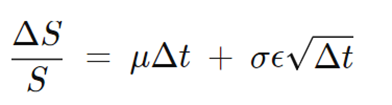

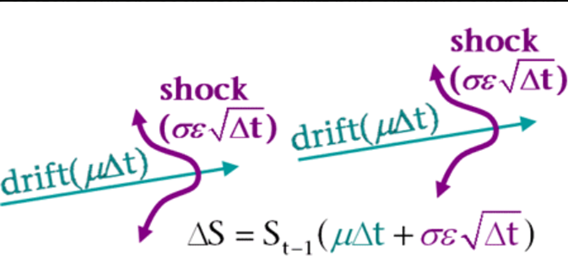

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data_monte (1).csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock
0,01-08-1984,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,21-08-1984,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,12-09-1984,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
3,14-09-1984,0.44052,0.45589,0.44052,0.44566,68847968,AAPL
4,17-09-1984,0.45718,0.46357,0.45718,0.45718,53755262,AAPL


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [ ]:
def separate_stock(df):
  data = pd.DataFrame(df)
  unique_values = data['Stock'].unique()
  # Loop over the unique values and create a filtered DataFrame for each value
  for value in unique_values:
    filtered_data = data[data['Stock'] == value]
    # Write the filtered DataFrame to a separate CSV file
    filename = f'{value}_file.csv'
    filtered_data.to_csv(filename, index=False)

In [ ]:
separate_stock(df)

In [ ]:
FB = pd.read_csv("/content/FB_file.csv")
FB.head()

,Date,Open,High,Low,Close,Volume,Stock
0,21-05-2012,36.53,36.66,33.00,34.03,169418988,FB
1,22-05-2012,32.61,33.59,30.94,31.00,101876406,FB
2,23-05-2012,31.37,32.50,31.36,32.00,73678512,FB
3,30-05-2012,28.69,29.55,27.86,28.19,57255131,FB
4,31-05-2012,28.55,29.67,26.83,29.60,111609237,FB


In [ ]:
FB.tail()

,Date,Open,High,Low,Close,Volume,Stock
972,06-11-2017,178.56,180.450,178.310,180.17,13275578,FB
973,07-11-2017,180.50,180.748,179.403,180.25,12903836,FB
974,08-11-2017,179.79,180.350,179.110,179.56,10467606,FB
975,09-11-2017,178.31,179.400,177.090,179.30,12602188,FB
976,10-11-2017,178.35,179.100,177.960,178.46,11060355,FB


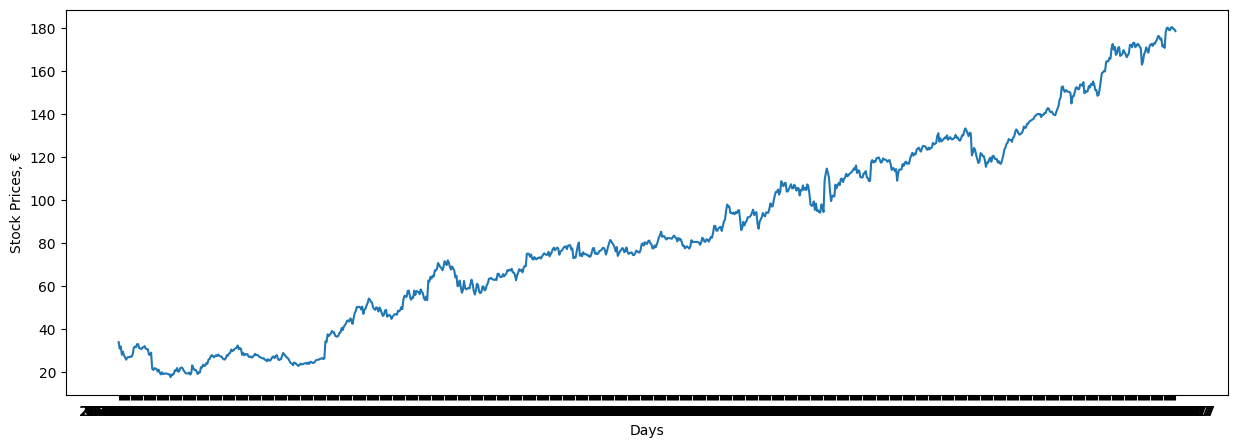

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(FB['Date'], FB['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

In [ ]:
FB['Date'] = pd.to_datetime(FB['Date'])

<ipython-input-65-a6a6e134bb45>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FB['Date'] = pd.to_datetime(FB['Date'])


In [ ]:
start_date = '21-05-2012'
end_date = '19-06-2012'
pred_end_date = '21-08-2012'

In [ ]:
FB_1 = FB.loc[(FB['Date']>=start_date)&(FB['Date']<=end_date),['Date','Close']]

<ipython-input-67-1be1e480e826>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FB_1 = FB.loc[(FB['Date']>=start_date)&(FB['Date']<=end_date),['Date','Close']]


In [ ]:
FB_test = FB.loc[(FB['Date']>=end_date)&(FB['Date']<=pred_end_date),['Date','Close']]

<ipython-input-68-191d61c9bb51>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FB_test = FB.loc[(FB['Date']>=end_date)&(FB['Date']<=pred_end_date),['Date','Close']]


In [ ]:
FB_test.head()

,Date,Close
9,2012-08-06,27.10
15,2012-06-19,31.91
16,2012-06-20,31.60
17,2012-06-22,33.05
18,2012-06-26,33.10


In [ ]:
FB_1.head()

,Date,Close
0,2012-05-21,34.03
1,2012-05-22,31.00
2,2012-05-23,32.00
3,2012-05-30,28.19
4,2012-05-31,29.60


In [ ]:
FB_1.tail()

,Date,Close
14,2012-06-18,31.41
15,2012-06-19,31.91
23,2012-06-07,31.73
33,2012-06-08,21.92
88,2012-06-12,26.97


In [ ]:
So = FB_1.loc[FB_1.shape[0] - 1, "Close"]
print(So)

27.27


In [ ]:
dt = 1
print(dt)

1


In [ ]:
#Calculate No of workDays (Mon-Fri)
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date) + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date)).to_series().map(lambda x: 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print(T)

45


<ipython-input-74-70383a93d629>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date) + pd.Timedelta('1 days'),
<ipython-input-74-70383a93d629>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  end = pd.to_datetime(pred_end_date)).to_series().map(lambda x: 1 if x.isoweekday() in range(1,6) else 0).sum()


In [ ]:
N = T/dt
print(N)

45.0


In [ ]:
t = np.arange(1,int(N)+1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
returns =(FB_1.loc[1:,'Close']-FB_1.shift(1).loc[1:,'Close'])/FB_1.shift(1).loc[1:,'Close']
print(returns.tolist())

[-0.08903908316191599, 0.03225806451612903, -0.11906249999999996, 0.05001773678609436, -0.09425675675675685, 0.017157776948899698, 0.03740374037403739, 0.11028632025450694, 0.01591849729385546, -0.005640864932622993, -0.30917113142136776, 0.23038321167883197]


In [ ]:
mu = np.mean(returns)
print(mu)

-0.01031208236835906


In [ ]:
sigma = np.std(returns)
print(sigma)

0.12782129250680288


In [ ]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([-1.0826747 , -0.31112456,  0.39640453, -1.20101765,  1.29588368,
       -0.5183345 ,  0.56155783,  0.10313039, -0.34937472, -0.29455442,
       -1.46622841, -1.33904933, -0.7710058 ,  1.03767683,  0.1723323 ,
       -0.41744635, -0.36449381,  1.16821773,  0.35128703,  1.26533013,
       -1.55309775,  0.69310964, -0.6043182 ,  2.80177937, -0.80749077,
        0.75686316,  0.31491862, -1.55152422,  0.13956277,  0.24939798,
       -1.12506938,  0.39353542, -0.35879072, -0.52686422, -0.80741117,
        0.78045944, -0.13049338,  0.3248154 , -0.41400267,  1.29421791,
       -1.43901765,  0.03685524, -0.03256998,  0.54785391, -0.16345218]), '2': array([-0.45763263,  0.60355228, -0.07198506, -0.38709615,  2.16284979,
       -1.6043104 , -0.69982292, -0.27779812,  0.66717665,  1.39385034,
        1.48241993,  0.19910386,  0.44324686,  1.77153521, -1.42683326,
       -0.86751608, -0.62265785, -1.53044388, -0.11205761,  1.26866146,
        0.83160342,  0.11458363,  0.79461303, -1.05

In [ ]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([-1.0826747 , -1.39379926, -0.99739473, -2.19841238, -0.9025287 ,
       -1.4208632 , -0.85930537, -0.75617498, -1.1055497 , -1.40010412,
       -2.86633253, -4.20538186, -4.97638766, -3.93871084, -3.76637854,
       -4.18382488, -4.54831869, -3.38010096, -3.02881393, -1.7634838 ,
       -3.31658154, -2.62347191, -3.22779011, -0.42601074, -1.23350151,
       -0.47663834, -0.16171973, -1.71324394, -1.57368117, -1.32428319,
       -2.44935257, -2.05581715, -2.41460787, -2.9414721 , -3.74888327,
       -2.96842383, -3.09891721, -2.77410181, -3.18810448, -1.89388657,
       -3.33290421, -3.29604897, -3.32861895, -2.78076505, -2.94421723]), '2': array([-0.45763263,  0.14591965,  0.07393459, -0.31316156,  1.84968824,
        0.24537784, -0.45444509, -0.73224321, -0.06506655,  1.32878379,
        2.81120372,  3.01030758,  3.45355444,  5.22508966,  3.7982564 ,
        2.93074032,  2.30808246,  0.77763858,  0.66558097,  1.93424244,
        2.76584586,  2.88042949,  3.67504252,  2.62

In [ ]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)

drift:
 [-0.01848122 -0.03696245 -0.05544367 -0.0739249  -0.09240612 -0.11088734
 -0.12936857 -0.14784979 -0.16633101 -0.18481224 -0.20329346 -0.22177469
 -0.24025591 -0.25873713 -0.27721836 -0.29569958 -0.3141808  -0.33266203
 -0.35114325 -0.36962448 -0.3881057  -0.40658692 -0.42506815 -0.44354937
 -0.46203059 -0.48051182 -0.49899304 -0.51747427 -0.53595549 -0.55443671
 -0.57291794 -0.59139916 -0.60988038 -0.62836161 -0.64684283 -0.66532406
 -0.68380528 -0.7022865  -0.72076773 -0.73924895 -0.75773017 -0.7762114
 -0.79469262 -0.81317385 -0.83165507]


In [ ]:
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

diffusion:
 {'1': array([-0.13838888, -0.17815722, -0.12748828, -0.28100391, -0.11536239,
       -0.18161657, -0.10983752, -0.09665526, -0.14131279, -0.17896312,
       -0.36637833, -0.53753734, -0.6360883 , -0.50345111, -0.48142337,
       -0.5347819 , -0.58137197, -0.43204887, -0.38714691, -0.22541078,
       -0.42392974, -0.33533557, -0.4125803 , -0.05445324, -0.15766776,
       -0.06092453, -0.02067122, -0.21898906, -0.20114996, -0.16927159,
       -0.31307941, -0.26277721, -0.3086383 , -0.37598277, -0.4791871 ,
       -0.37942777, -0.3961076 , -0.35458928, -0.40750763, -0.24207903,
       -0.42601612, -0.42130524, -0.42546838, -0.35544098, -0.37633365]), '2': array([-0.05849519,  0.01865164,  0.00945041, -0.04002871,  0.23642954,
        0.03136451, -0.05808776, -0.09359627, -0.00831689,  0.16984686,
        0.35933169,  0.38478141,  0.44143779,  0.66787771,  0.48549804,
        0.37461102,  0.29502208,  0.09939877,  0.08507542,  0.24723737,
        0.35353399,  0.36818022,  0.469

In [ ]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
print(S)

[[27.27       23.31080748 21.99175316 22.71113295 19.12236113 22.15401386
  20.35411867 21.46837898 21.35491968 20.04828053 18.95394029 15.42694115
  12.76204035 11.35255677 12.72538674 12.77059762 11.88534005 11.13657146
  12.69332539 13.03316202 15.04058092 12.1066121  12.98590714 11.80046274
  16.57316105 14.67417059 15.86873545 16.21801936 13.05699331 13.04861171
  13.22460215 11.24349623 11.60702862 10.88372455  9.98858382  8.84415917
   9.59301635  9.26157679  9.47741325  8.82432255 10.22115117  8.34815785
   8.23398876  8.04963056  8.4754383   8.14821167]
 [27.27       25.24961173 26.77520807 26.04416994 24.33300324 31.4944273
  25.1853976  22.60861146 21.42034419 22.90005454 26.86493272 31.87510915
  32.09800624 33.34704225 41.05562183 33.58457494 29.50909826 26.75251469
  21.59634177 20.89937733 24.12865383 26.34333995 26.24250682 28.51606847
  24.47056429 21.58143479 21.46820534 17.546046   17.26320138 17.06771107
  18.5896984  16.195387   18.94846574 20.02516142 22.50003711 

<ipython-input-85-4103ee49a608>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot(pd.date_range(start = FB_1["Date"].max(),
<ipython-input-85-4103ee49a608>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot(pd.date_range(start = FB_1["Date"].max(),


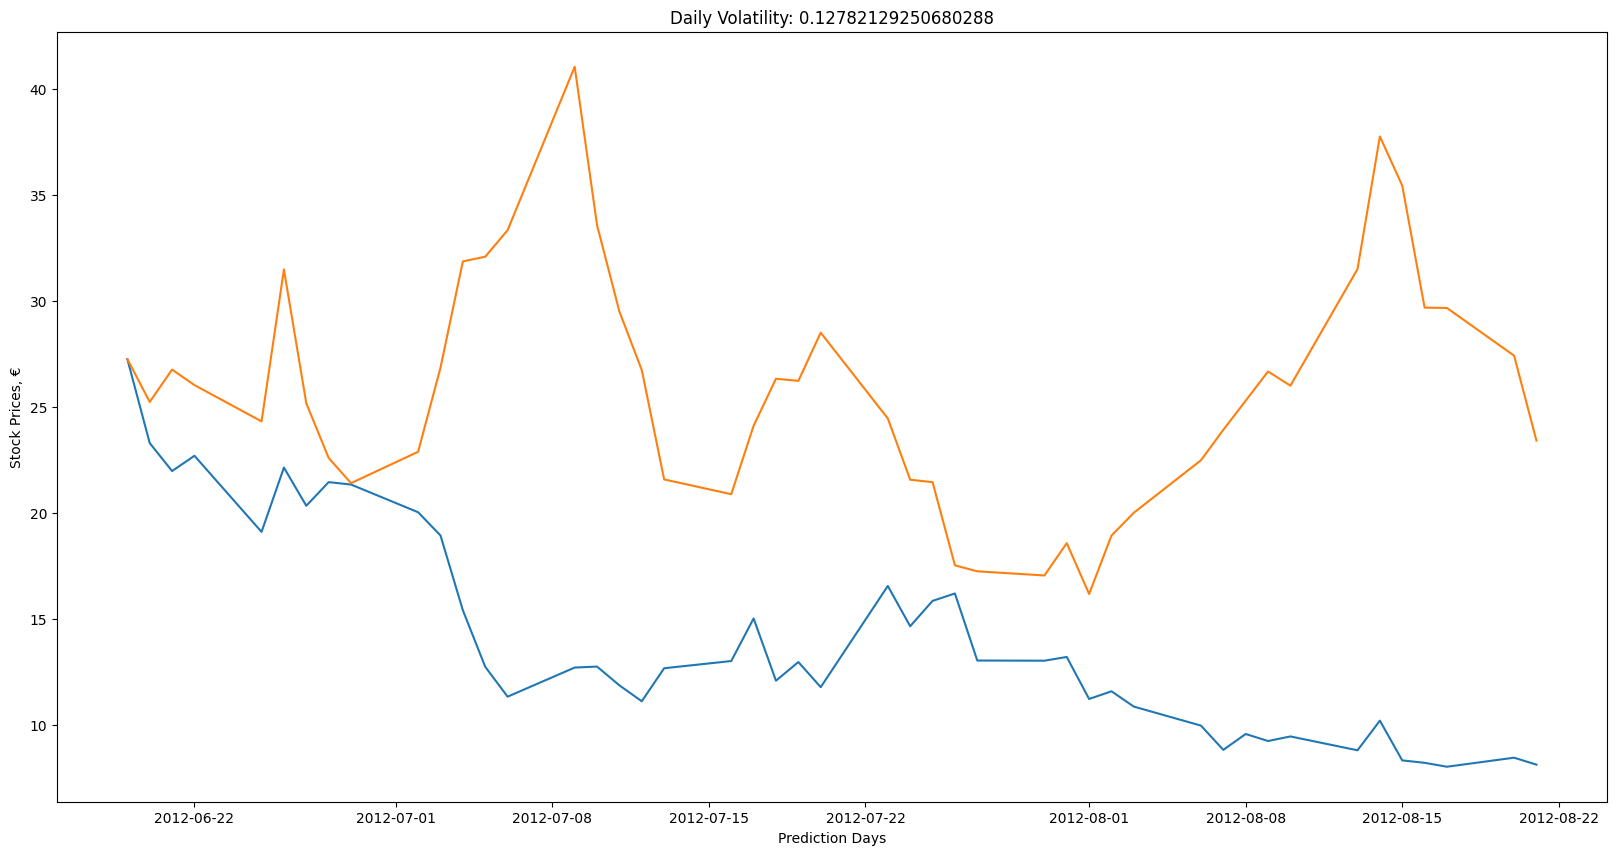

In [ ]:
# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = FB_1["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
    
plt.show()

In [ ]:
n_days = 45 
start_date = pd.to_datetime(FB_1['Date'].max()) + pd.Timedelta('1 days')  
end_date = pd.to_datetime(pred_end_date) 
dates = pd.date_range(start=start_date, end=end_date, freq='B')[:n_days] 

Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:n_days, :10], index=dates)  

<ipython-input-86-9f877b5e2419>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  end_date = pd.to_datetime(pred_end_date)  # End date for index


In [ ]:
Preds_df

,0,1
2012-06-20,27.270000,27.270000
2012-06-21,23.310807,25.249612
2012-06-22,21.991753,26.775208
2012-06-25,22.711133,26.044170
2012-06-26,19.122361,24.333003
2012-06-27,22.154014,31.494427
2012-06-28,20.354119,25.185398
2012-06-29,21.468379,22.608611
2012-07-02,21.354920,21.420344
2012-07-03,20.048281,22.900055


In [ ]:
actual_prices = FB_1.set_index('Date')['Close']

In [ ]:
Preds_df = Preds_df.sort_index(inplace=True)

In [ ]:
Dates = pd.date_range(end_date,pred_end_date,freq='D')

<ipython-input-136-91efe0fe05bc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Dates = pd.date_range(end_date,pred_end_date,freq='D')


In [ ]:
Preds_df = pd.DataFrame(index = Date)